- do movies 1980 - 2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=1.2)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# loading data

In [372]:
# original df
raw = pd.read_csv('data/movies_raw.csv', index_col=0)           
raw.shape

(1187, 14)

In [375]:
# movies after 1980 (take out outliers - very old movies)
df_after1890 = pd.read_csv('data/movies_after1980.csv', index_col=0)   
df_after1890.shape

(847, 14)

In [370]:
# df cleaned + movies after 1980 + season 
df = pd.read_csv('data/movies_clean.csv', index_col=0)           
df.shape

(847, 15)

In [376]:
df.head()

,link_stub,rank,title,lifetime_gross,year,distributor,domestic_total_gross,budget,release_date,rating,runtime_minutes,genres,director,actors,date_to_season
Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,936662225,2015,Walt Disney Studios Motion Pictures,936662225,245000000,2015-12-16,PG-13,138,"'Action', 'Adventure', 'Sci-Fi'",J.J. Abrams,"'Daisy Ridley', 'John Boyega', 'Oscar Isaac', ...",winter
Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,858373000,2019,Walt Disney Studios Motion Pictures,858373000,356000000,2019-04-24,PG-13,181,"'Action', 'Adventure', 'Drama', 'Sci-Fi'",Anthony Russo,"'Robert Downey Jr.', 'Chris Evans', 'Mark Ruff...",spring
Avatar,/title/tt0499549/?ref_=bo_cso_table_3,3,Avatar,760507625,2009,Twentieth Century Fox,760507625,237000000,2009-12-16,PG-13,162,"'Action', 'Adventure', 'Fantasy', 'Sci-Fi'",James Cameron,"'Sam Worthington', 'Zoe Saldana', 'Sigourney W...",winter
Titanic,/title/tt0120338/?ref_=bo_cso_table_6,6,Titanic,659363944,1997,Paramount Pictures,659363944,200000000,1997-12-19,PG-13,194,"'Drama', 'Romance'",James Cameron,"'Leonardo DiCaprio', 'Kate Winslet', 'Billy Za...",winter
Jurassic World,/title/tt0369610/?ref_=bo_cso_table_7,7,Jurassic World,652385625,2015,Universal Pictures,652385625,150000000,2015-06-10,PG-13,124,"'Action', 'Adventure', 'Sci-Fi'",Colin Trevorrow,"'Chris Pratt', 'Bryce Dallas Howard', 'Ty Simp...",summer


In [379]:
# df clean with Other for Caterogeries features
df_copy = pd.read_csv('data/movies_clean_copy.csv', index_col=0)           
df_copy[df_copy['distributor'] == "Other"]

,link_stub,rank,title,lifetime_gross,year,distributor,domestic_total_gross,budget,release_date,rating,runtime_minutes,genres,director,actors,date_to_season
The Passion of the Christ,/title/tt0335345/?ref_=bo_cso_table_47,47,The Passion of the Christ,370782930,2004,Other,370782930,30000000,2004-02-25,R,127,Other,Mel Gibson,"['Jim Caviezel', 'Monica Bellucci', 'Maia Morg...",winter
The Twilight Saga: Eclipse,/title/tt1325004/?ref_=bo_cso_table_89,89,The Twilight Saga: Eclipse,300531751,2010,Other,300531751,68000000,2010-06-30,PG-13,124,Other,David Slade,"['Kristen Stewart', 'Robert Pattinson', 'Taylo...",summer
The Twilight Saga: New Moon,/title/tt1259571/?ref_=bo_cso_table_90,90,The Twilight Saga: New Moon,297816253,2009,Other,297816253,50000000,2009-11-18,PG-13,130,Other,Chris Weitz,"['Kristen Stewart', 'Robert Pattinson', 'Taylo...",fall
The Twilight Saga: Breaking Dawn - Part 1,/title/tt1324999/?ref_=bo_cso_table_105,105,The Twilight Saga: Breaking Dawn - Part 1,281287133,2011,Other,281287133,110000000,2011-11-16,PG-13,117,Other,Bill Condon,"['Kristen Stewart', 'Robert Pattinson', 'Taylo...",fall
My Big Fat Greek Wedding,/title/tt0259446/?ref_=bo_cso_table_140,140,My Big Fat Greek Wedding,241438208,2002,Other,241438208,5000000,2002-04-19,PG,95,"'Comedy', 'Drama', 'Romance'",Joel Zwick,"['Nia Vardalos', 'John Corbett', 'Michael Cons...",spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sideways,/title/tt0375063/?ref_=bo_cso_table_149,"1,149",Sideways,71503593,2004,Other,71503593,16000000,2004-10-22,R,127,"'Comedy', 'Drama', 'Romance'",Alexander Payne,"['Paul Giamatti', 'Thomas Haden Church', 'Virg...",fall
Safe Haven,/title/tt1702439/?ref_=bo_cso_table_151,"1,151",Safe Haven,71349120,2013,Other,71349120,28000000,2013-02-13,PG-13,115,Other,Lasse Hallström,"['Julianne Hough', 'Josh Duhamel', 'Cobie Smul...",winter
Rocky Balboa,/title/tt0479143/?ref_=bo_cso_table_175,"1,175",Rocky Balboa,70270943,2006,Other,70270943,24000000,2006-12-20,PG,102,Other,Sylvester Stallone,"['Sylvester Stallone', 'Antonio Tarver', 'Milo...",winter
Act of Valor,/title/tt1591479/?ref_=bo_cso_table_187,"1,187",Act of Valor,70012847,2012,Other,70012847,12000000,2012-02-23,R,110,Other,Mike McCoy,"['Alex Veadov', 'Roselyn Sanchez', 'Nestor Ser...",winter


In [381]:
# numeric dataset
df_num = pd.read_csv('data/movies_num.csv', index_col=0)     # log gross is NOT included      
df_num.head()

,lifetime_gross,year,budget,runtime_minutes
Star Wars: Episode VII - The Force Awakens,936662225,2015,245000000,138
Avengers: Endgame,858373000,2019,356000000,181
Avatar,760507625,2009,237000000,162
Titanic,659363944,1997,200000000,194
Jurassic World,652385625,2015,150000000,124


In [382]:
# LOG gross with numeric dataset 

                             #np.log(movies["lifetime_gross"])
df_num_log = pd.read_csv('data/movies_num_log.csv', index_col=0)     # log gross is included      
df_num_log.head(3)

,lifetime_gross,year,budget,runtime_minutes,log_gross
Star Wars: Episode VII - The Force Awakens,936662225,2015,245000000,138,20.657833
Avengers: Endgame,858373000,2019,356000000,181,20.570549
Avatar,760507625,2009,237000000,162,20.449497


/Users/sabrina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_gross', ylabel='Density'>

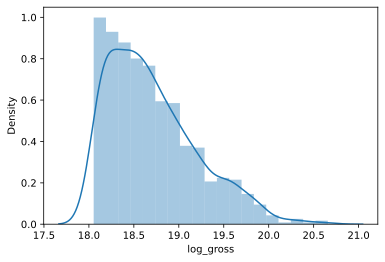

In [248]:
# log Gross 
# lifegross is not a normal distribution, it is right skewed -> use log to fix it if we need later

log_gross = df_num_log['log_gross']

sns.distplot(log_gross)


In [78]:
rating_dummies = pd.read_csv('data/rating_dummies.csv', index_col=0)   #drop_first (G)       
rating_dummies.head()

,PG,PG-13,R
Star Wars: Episode VII - The Force Awakens,0,1,0
Avengers: Endgame,0,1,0
Avatar,0,1,0
Titanic,0,1,0
Jurassic World,0,1,0


In [223]:
distributor_dummies = pd.read_csv('data/distributor_dummies.csv', index_col=0)   #drop_first (G)       
distributor_dummies.head()


,DreamWorks Distribution,Lionsgate,Miramax,New Line Cinema,Other,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
Star Wars: Episode VII - The Force Awakens,0,0,0,0,0,0,0,0,0,1,0
Avengers: Endgame,0,0,0,0,0,0,0,0,0,1,0
Avatar,0,0,0,0,0,0,0,1,0,0,0
Titanic,0,0,0,0,0,1,0,0,0,0,0
Jurassic World,0,0,0,0,0,0,0,0,1,0,0


In [579]:
seasons_dummies  = pd.read_csv('data/seasons_dummies.csv', index_col=0)   #drop_first (Fall)       
seasons_dummies.head()

,spring,summer,winter
Star Wars: Episode VII - The Force Awakens,0,0,1
Avengers: Endgame,1,0,0
Avatar,0,0,1
Titanic,0,0,1
Jurassic World,0,1,0


In [79]:
genres_dummies = pd.read_csv('data/genres_dummies.csv', index_col=0)  # didnt drop_first     
genres_dummies.head()  # maybe will condsider groupby later 

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Star Wars: Episode VII - The Force Awakens,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Avengers: Endgame,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Titanic,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Jurassic World,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [384]:
genres_dummies.groupby(["Action","Adventure"]).sum()

Animation  Biography  Comedy  Crime  Documentary  Drama  \
Action Adventure                                                            
0      0                 12         33     181     53            1    182   
       1                 72          1      90      4            0     23   
1      0                  3          4      36     56            2     40   
       1                 18          0      44     11            0     24   

                  Family  Fantasy  History  Horror  Music  Musical  Mystery  \
Action Adventure                                                              
0      0              34       36       19      42     17       12       51   
       1             105       86        1       3      4       12        7   
1      0               7       10        4       9      1        0       12   
       1              34       66        5       4      0        1       10   

                  Romance  Sci-Fi  Sport  Thriller  War  Western  
Action Adventure                                                  
0      0              102      17     18        80   12        2  
       1               12      21      3         6    2        2  
1      0                4      39      3        82   11        2  
       1                8     117      0        70    6        4

# Modeling

# 1. baseline linear regression
    - data: numberic data only

In [143]:
df_num.head()

,lifetime_gross,year,budget,runtime_minutes
Star Wars: Episode VII - The Force Awakens,936662225,2015,245000000,138
Avengers: Endgame,858373000,2019,356000000,181
Avatar,760507625,2009,237000000,162
Titanic,659363944,1997,200000000,194
Jurassic World,652385625,2015,150000000,124


In [ ]:
sns.pairplot(df_num)

plt.savefig("./charts/pairplot.png",dpi=fig.dpi,bbox_inches='tight')


### 0. Year outliers removed

In [185]:
# takeout outlier on Year

# 1980 - 2020 :  840 movies left
df.year.describe()

count     847.000000
mean     2007.950413
std         7.375276
min      1980.000000
25%      2003.000000
50%      2009.000000
75%      2014.000000
max      2020.000000
Name: year, dtype: float64

### 1a. simple linear regression : R^2: 0.277963

In [253]:
# original : num dataset

X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y = df_num["lifetime_gross"]



In [254]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.2779638180584031

In [256]:
print(lr.intercept_)
print(lr.coef_)

351613235.14829993
[-1.74127362e+05  7.83380893e-01  7.18543221e+05]


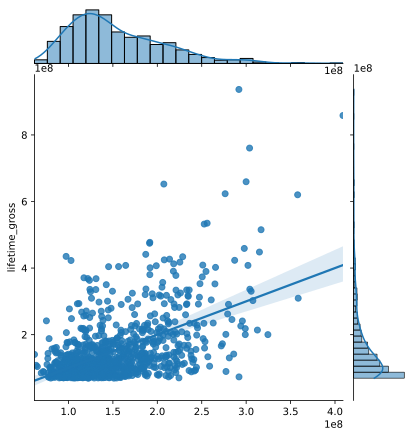

In [257]:
preds = lr.predict(X)  # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')  # a plot of actual vs. predicted values
plt.savefig("./charts/movies_num_jointplot.png")

# LOG GROSS instead



In [773]:
X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y_log = df_num_log['log_gross'] # log_gross


lr = LinearRegression()
lr.fit(X, y_log) 
lr.score(X, y_log)

0.276079115979469

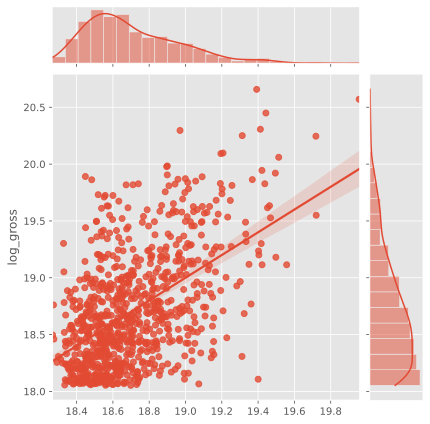

In [774]:
preds = lr.predict(X)  # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_log, kind='reg')  # a plot of actual vs. predicted values
plt.savefig("./charts/movies_num_log_jointplot.png")

### 1b. OLS

In [258]:
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifetime_gross   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     108.2
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           2.96e-59
Time:                        17:22:13   Log-Likelihood:                -16667.
No. Observations:                 847   AIC:                         3.334e+04
Df Residuals:                     843   BIC:                         3.336e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.516e+08   8.26e+08      0.426      0.670   -1.27e+09    1.97e+09
year            -1.741e+05   4.11e+05     -0.424      0.672   -9.81e+05    6.32e+05
budget              0.7834      0.054     14.508      0.000       0.677       0.889
runtime_minutes  7.185e+05   1.51e+05      4.760      0.000    4.22e+05    1.01e+06
==============================================================================
Omnibus:                      394.244   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2679.339
Skew:                           2.004   Prob(JB):                         0.00
Kurtosis:                      10.737   Cond. No.                     2.97e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### This OLS statsmodels table tells us:


- **log-likehood**:  want this to be relatively close to zero
- **std err**: smaller  values tend to mean a more precise coefficient estimate.
- **t & P t**:  if we assume the coefficient is zero, the probability of seeing our data (or something more extreme) is P>|t|.
- **Prob (F-statistic)**: want this to be small.(if small, it's safe to say that one of the coefficients is probably nonzero.)

- **condition number** : large -> strong multicollinearity or other numerical problems

### 1c. train test split on Simple Linear regreesion

In [790]:
# original : num dataset

X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y = df_num["lifetime_gross"]  # or log?

In [791]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 
# Fit a simple linear regression on training set


In [792]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.30341126718470246

In [793]:
# Score on validation set
lr.score(X_val,y_val)     

0.3046499326756853

In [785]:
#Tr =< Te:(what does this mean??)    goodfit

# 2. Feature Engineering


### 2a. Polynomial : R^2: 0.378
    - degree=2
    - data: numberic data only

In [794]:
# original : num dataset (movies_num)

X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y = df_num["lifetime_gross"]  # or log?

In [795]:

# test/val/train = 60/20/20
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [796]:
# from sklearn.preprocessing import PolynomialFeatures
# this poly is same as the next 3 compasrions chart below

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # for train: fit + transform

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)          # for val: only transform

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [797]:
lr_poly.score(X_val_poly, y_val) 

0.37845759167421955

In [798]:
poly.get_feature_names()    # add num data interaction features ( will change name later)

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [799]:
lr_poly.coef_

array([ 0.00000000e+00,  1.47416792e-02, -5.15363218e+01, -2.54087227e-01,
       -3.34203529e+02,  2.52002205e-02, -9.13275142e+02,  9.31664196e-10,
        1.24011324e-02,  5.32776720e+03])

In [160]:
poly

PolynomialFeatures()

In [ ]:
# TAQ

In [327]:
#preds = lr_poly.predict(X)  # generate predictions (on training data) using fit model

#sns.jointplot(x=preds ,y=y, kind='reg')  # a plot of actual vs. predicted values
#plt.savefig("./charts/movies_num_ploy_jointplot.png")# split_and_validate(X, y):

### 2b. StandardScaler()
    - apply on step 3 below

### 2c. Log for Gross
    - fix the right skewed distribution on lifetime Gross 

# 3. model selections 

### 3a. Simple Validation Method: Train / Validation / Test

- compare : linear, Ridge, Poly

In [385]:
# original : num dataset (movies_num)

X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y = df_num["lifetime_gross"]

In [386]:
# test/val/train = 60/20/20
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [437]:
##set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=60)  # TUNED this! 
                        ## tried but R^2 only went up 0.001 from 0.305 to 0.306(when change alpha from 1 to 60) 

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [ ]:
# lr_reg = Ridge(alpha=1)  
    
    # TUNED this! 
   ## tried but R^2 only went up 0.001 from 0.305 to 0.306(when change alpha from 1 to  60) 

In [438]:
#validate

lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')  

Linear Regression val R^2: 0.305
Ridge Regression val R^2: 0.306
Degree 2 polynomial regression val R^2: 0.378


In [203]:
# Degree 2 polynomial regression did the best 

In [ ]:
# NEW GOAL:  fit ridge to poly

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)


##
lr_poly = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1) 

lr_poly.fit(X_train_poly, y_train)

In [359]:
# TAQ
# we will see
lr_poly.score(X_test_poly, y_test)

0.10336206347674148

In [294]:
lr.fit(X,y)
print(f'Linear Regression test R^2: {lr.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.088


### 3b. Cross-Validation / Test

In [348]:
lr = LinearRegression()

cross_val_score(lr, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.35577149, 0.08977267, 0.33864325, 0.31137467, 0.2835636 ])

In [349]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lr, X, y, cv=kf, scoring='r2')

array([0.3369482 , 0.29512624, 0.30235782, 0.31189259, 0.13638951])

In [442]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')))  
print(np.mean(cross_val_score(lr_reg, X, y, cv=kf, scoring='r2')))# may change

0.30042910930839184
0.30043339385503004


In [441]:
# not working that well since df size is not a small  ?

# 4. Add Category features (rating): R^2 :  0.1023 
(drop so much... -> not gonna use)

In [676]:
gross_rating = df_all.loc[:, ['lifetime_gross', 'rating']]
b = gross_rating.groupby(["rating"]).sum()
b

,lifetime_gross
rating,
G,2601742360
PG,29571209207
PG-13,70994618330
R,27118771240


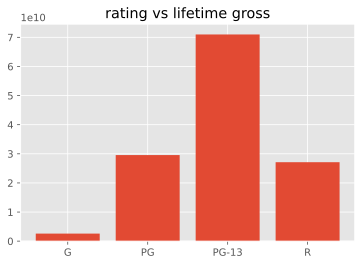

In [678]:
plt.title("rating vs lifetime gross")
plt.bar(b.index, b.lifetime_gross)
        
plt.savefig("./charts/rating_gross.png")

In [ ]:
poly = PolynomialFeatures(degree=2)  


X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

# budget **2
# manual create

In [364]:
X_train_poly # make this df # join

array([[1.0000e+00, 2.0080e+03, 7.0000e+07, ..., 4.9000e+15, 7.8400e+09,
        1.2544e+04],
       [1.0000e+00, 1.9950e+03, 9.0000e+07, ..., 8.1000e+15, 1.1520e+10,
        1.6384e+04],
       [1.0000e+00, 2.0090e+03, 2.3700e+08, ..., 5.6169e+16, 3.8394e+10,
        2.6244e+04],
       ...,
       [1.0000e+00, 2.0150e+03, 2.5000e+08, ..., 6.2500e+16, 3.5250e+10,
        1.9881e+04],
       [1.0000e+00, 2.0020e+03, 5.2000e+07, ..., 2.7040e+15, 7.3320e+09,
        1.9881e+04],
       [1.0000e+00, 2.0150e+03, 3.5000e+07, ..., 1.2250e+15, 4.3750e+09,
        1.5625e+04]])

In [170]:
rating_dummies.head()

,PG,PG-13,R
Star Wars: Episode VII - The Force Awakens,0,1,0
Avengers: Endgame,0,1,0
Avatar,0,1,0
Titanic,0,1,0
Jurassic World,0,1,0


In [295]:
# original 

X = df_num[['year', 'budget', 'runtime_minutes']]

    # Target
y = df_num["lifetime_gross"]

#y = df_num_log["log_gross"]

In [296]:
X2 = X.copy()
X2["rating"] = df_all['rating']

In [297]:
X2

,year,budget,runtime_minutes,rating
Star Wars: Episode VII - The Force Awakens,2015,245000000,138,PG-13
Avengers: Endgame,2019,356000000,181,PG-13
Avatar,2009,237000000,162,PG-13
Titanic,1997,200000000,194,PG-13
Jurassic World,2015,150000000,124,PG-13
...,...,...,...,...
The Kid,2000,65000000,104,PG
Divine Secrets of the Ya-Ya Sisterhood,2002,27000000,116,PG-13
The First Purge,2018,13000000,97,R
The Thomas Crown Affair,1999,48000000,113,R


In [298]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=10)
    
    # fit linear regression to training data
    lr_model = LinearRegression()                     #
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [299]:
split_and_validate(pd.get_dummies(X2, drop_first=True), y)


Validation R^2 score was: 0.10234087212762644
Feature coefficient results: 

year : 171219.44
budget : 0.77
runtime_minutes : 929246.85
rating_PG : -40470520.96
rating_PG-13 : -46570070.59
rating_R : -60136895.46


In [ ]:
# do poly from here

In [215]:
# TAQ: r drop so much. what to do?

# TAQ: if I want to combine Poly above(num only)+ rating(here) , how?

In [ ]:
# jo

- Conclusion:
    
    PG makes more gross than PG-13

# 5. Add Category features (Season): R^2: 0.0843 
( even lower...cant use)

In [677]:
gross_seasons = df_all.loc[:, ['lifetime_gross', 'date_to_season']]
a = gross_seasons.groupby(["date_to_season"]).sum()
a

,lifetime_gross
date_to_season,
fall,24886483652
spring,33371901884
summer,43664143235
winter,28363812366


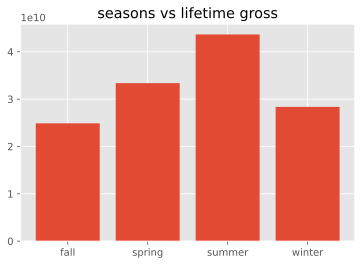

In [673]:
plt.title("seasons vs lifetime gross")
plt.bar(a.index, a.lifetime_gross)
        
plt.savefig("./charts/seasons_gross.png")

In [218]:
X3 = X2.copy()
X3["season"] = df_all['date_to_season']

In [217]:
split_and_validate(pd.get_dummies(X3, drop_first=True), y) # R2 went down... TAQ


Validation R^2 score was: 0.08435558802458998
Feature coefficient results: 

year : 170875.80
budget : 0.74
runtime_minutes : 936659.85
rating_PG : -42973420.85
rating_PG-13 : -48962994.98
rating_R : -63260183.99
season_spring : 15234565.04
season_summer : 1442570.70
season_winter : 2602572.28


In [177]:
# spring : 3,4,5
# bcuz some companies want their movies to be fresh in theaters for Oscar 

- Conclusion:

movie studio sometimes release thier movie a few months prior to Oscar (April 25)
thisis so movies will be fresh in the minds of viewers.
so some of good movies wait to release around spring/summer. 

# 6. Add Category features (Distributior): ~R^2: 0.07449

In [680]:
gross_dist = df_copy.loc[:, ['lifetime_gross', 'distributor']]
c = gross_dist.groupby(["distributor"]).sum()
c

,lifetime_gross
distributor,
DreamWorks,3935404812
DreamWorks Distribution,2625459908
Lionsgate,3412061540
Miramax,1384391629
New Line Cinema,3200469787
Other,8936709539
Paramount Pictures,12193250990
Sony Pictures Entertainment (SPE),15486712238
Twentieth Century Fox,16766435417


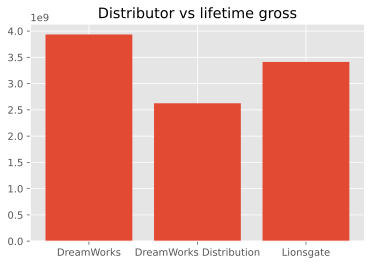

In [687]:
plt.title("Distributor vs lifetime gross")
plt.bar(c.index[:3], c.lifetime_gross[:3])
        
plt.savefig("./charts/distributor_gross.png")

In [219]:
dist_counts= raw['distributor'].value_counts()
other_dist = list(dist_counts[dist_counts<=9].index)

In [220]:
X4 = X3.copy()
X4["distributor"] = raw['distributor'].replace(other_dist, 'Other')

In [221]:
split_and_validate(pd.get_dummies(X4, drop_first=True), y)


Validation R^2 score was: 0.07449986880598991
Feature coefficient results: 

year : 29267.39
budget : 0.74
runtime_minutes : 926506.08
rating_PG : -26800125.75
rating_PG-13 : -29430389.12
rating_R : -41994538.43
season_spring : 14561740.67
season_summer : 3834213.17
season_winter : 6319355.03
distributor_DreamWorks : 16525154.71
distributor_DreamWorks Distribution : 34054098.33
distributor_Lionsgate : 40774085.25
distributor_Metro-Goldwyn-Mayer (MGM) : -15458080.94
distributor_Miramax : -5524698.23
distributor_New Line Cinema : 35123053.78
distributor_Other : 28361082.99
distributor_Paramount Pictures : -8453470.07
distributor_Sony Pictures Entertainment (SPE) : -5835250.22
distributor_TriStar Pictures : 7352095.46
distributor_Twentieth Century Fox : 13648082.74
distributor_Universal Pictures : 22223748.72
distributor_Walt Disney Studios Motion Pictures : 40747188.60
distributor_Warner Bros. : 1390357.58


- Conclusion:
    Disney > Warner > DreamWorks

In [300]:
X4.head()

,year,budget,runtime_minutes,rating,season,distributor
Star Wars: Episode VII - The Force Awakens,2015,245000000,138,PG-13,winter,Walt Disney Studios Motion Pictures
Avengers: Endgame,2019,356000000,181,PG-13,spring,Walt Disney Studios Motion Pictures
Avatar,2009,237000000,162,PG-13,winter,Twentieth Century Fox
Titanic,1997,200000000,194,PG-13,winter,Paramount Pictures
Jurassic World,2015,150000000,124,PG-13,summer,Universal Pictures


# 7. Linear, FE, RidgeCV, LassoCV



- can't see the good/improved results by adding each catergorical dummies as above 
- so I decided to add all dummies in one df to do the fair game
   - num + rating + distributor + seasons

In [807]:
# num 
# add rating
df_num_rating = df_num.merge(rating_dummies, left_index=True, right_index=True)
df_num_rating.shape

(840, 7)

In [808]:
# add distributor

df_num_rating_dist = df_num_rating.merge(distributor_dummies, left_index=True, right_index=True)
#df_num_rating_dist.head()
df_num_rating_dist.shape

(840, 18)

In [809]:
# add seasons

df_final = df_num_rating_dist.merge(seasons_dummies, left_index=True, right_index=True)

df_final.shape

(840, 21)

In [810]:
df_final.head()

,lifetime_gross,year,budget,runtime_minutes,PG,PG-13,R,DreamWorks Distribution,Lionsgate,Miramax,...,Other,Paramount Pictures,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,spring,summer,winter
Star Wars: Episode VII - The Force Awakens,936662225,2015,245000000,138,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Avengers: Endgame,858373000,2019,356000000,181,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
Avatar,760507625,2009,237000000,162,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Titanic,659363944,1997,200000000,194,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Jurassic World,652385625,2015,150000000,124,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [811]:
df_final.columns

Index(['lifetime_gross', 'year', 'budget', 'runtime_minutes', 'PG', 'PG-13',
       'R', 'DreamWorks Distribution', 'Lionsgate', 'Miramax',
       'New Line Cinema', 'Other', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'spring', 'summer', 'winter'],
      dtype='object')

In [812]:
# num + rating + distributor + seasons & gross log 

X = df_final[['year', 'budget', 'runtime_minutes', 'PG', 'PG-13',
       'R', 'DreamWorks Distribution', 'Lionsgate', 'Miramax',
       'New Line Cinema', 'Other', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'spring', 'summer', 'winter']]  

y = np.log(df_final['lifetime_gross'])

In [813]:
X.shape

(840, 20)

In [814]:
X, X_test, y, y_test = train_test_split(X ,y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

### 7a. Linear 

In [815]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.3300541698292285

In [717]:
lr.score(X_val,y_val)  # Tr> Te: overfitting  # do Ridge!! prevent overfitting

0.2711636259087663

In [688]:
# lr.score(X_test,y_test)

In [818]:
lr.coef_

array([ 3.91995268e-03,  3.39653335e-09,  3.69809317e-03, -1.56586126e-01,
       -1.69244769e-01, -2.66505368e-01,  6.54982100e-02,  1.34294069e-01,
       -2.79095509e-01,  7.28486550e-03, -1.02707673e-01, -2.67213316e-01,
       -2.08892994e-01, -1.37425265e-01, -8.27736831e-02, -6.04116130e-02,
       -1.47661736e-01,  1.26613092e-01,  7.88780688e-02, -4.80773847e-02])

In [819]:
preds = lr.predict(X)
#preds 

In [593]:
#y

In [820]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

print(rmse)
print(mae)

0.4159732644081365
0.3283939591709333


### 7b'. Feature Engineering
manually enter interactions instead of polynomial since already have many features

1. log on budget
2. budget divide by runtimes

In [821]:
X = df_final[['year', 'budget', 'runtime_minutes', 'PG', 'PG-13',
       'R', 'DreamWorks Distribution', 'Lionsgate', 'Miramax',
       'New Line Cinema', 'Other', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'spring', 'summer', 'winter']]  

y = np.log(df_final['lifetime_gross'])

In [822]:
#X['budget2'] = df_final['budget']**2 
X['budget3'] = np.log(df_final['budget'])
X['bug_run']= df_final['budget']/ df_final['runtime_minutes']

In [823]:
X.head()

,year,budget,runtime_minutes,PG,PG-13,R,DreamWorks Distribution,Lionsgate,Miramax,New Line Cinema,...,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,spring,summer,winter,budget3,bug_run
Star Wars: Episode VII - The Force Awakens,2015,245000000,138,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,19.316769,1.775362e+06
Avengers: Endgame,2019,356000000,181,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,19.690441,1.966851e+06
Avatar,2009,237000000,162,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,19.283571,1.462963e+06
Titanic,1997,200000000,194,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,19.113828,1.030928e+06
Jurassic World,2015,150000000,124,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,18.826146,1.209677e+06


In [855]:
df_1 = X.merge(y, left_index=True, right_index=True)

In [824]:
X, X_test, y, y_test = train_test_split(X ,y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [826]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.3347247673177335

In [827]:
lr.score(X_val,y_val) 

0.2803212261705724

### 7c'. RidgeCV

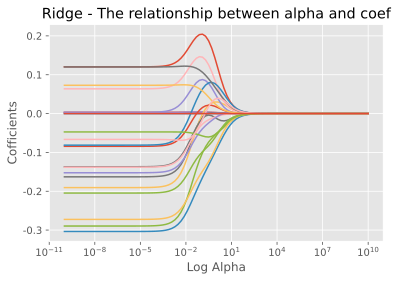

<Figure size 432x288 with 0 Axes>

In [868]:
# x_tr,x_te,y_tr,y_te = train_test_split(X,y,train_size = 0.8,random_state =22)

# add val set later?

######################ridge########################################
#tuning on alpha
alphas = 10**np.linspace(-10,10,100)
ridge_cofficients = []
 
for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)  #StandardScaler()
    ridge.fit(X_train, y_train)
    ridge_cofficients.append(ridge.coef_)
     
 #plot for the relationship between alpha and coef  
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.plot(alphas, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title(r'Ridge - The relationship between alpha and coef')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()
 
#ridge CV
ridge_cv = RidgeCV(alphas = alphas, normalize=True, cv = 10)
ridge_cv.fit(X_train, y_train)
# getting the best lambda: ridge_best_alpha = ridge_cv.alpha_
ridge_best_alpha = ridge_cv.alpha_ #the best lambda 
# modeling based on th best lambda 
ridge = Ridge(alpha = ridge_best_alpha,normalize = True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,ridge_predict))
mae = mean_absolute_error(y_test,ridge_predict)

#plt.savefig("./charts/ridgeCV_alpha.png")

In [829]:
ridge.score(X_train,y_train)

0.3156213906298566

In [830]:
ridge.score(X_val,y_val) 

0.2786620062839309

In [833]:
rmse

0.39611818674932303

In [834]:
mae

0.3274485578210542

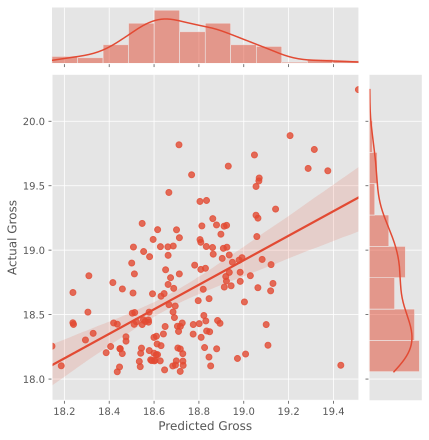

In [847]:
  # generate predictions (on training data) using fit model



sns.jointplot(x=ridge_predict,y=y_test, kind='reg')  # a plot of actual vs. predicted values
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("./charts/movies_ridge_log_jointplot.png")

### 7d'. LassoCV

In [835]:
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(X_train,y_train)

lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(X_train,y_train)
 
lasso_predict = lasso.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test,lasso_predict))
mae = mean_absolute_error(y_test,ridge_predict)

In [836]:
lasso.score(X_train,y_train)

0.3306568986363779

In [768]:
lasso.alpha_

0.019116440753857017

In [837]:
lasso.score(X_val,y_val) 

0.28530343032250527

In [838]:
rmse

0.39611818674932303

In [839]:
mae

0.3274485578210542

In [772]:
rmse

22985082.776250582

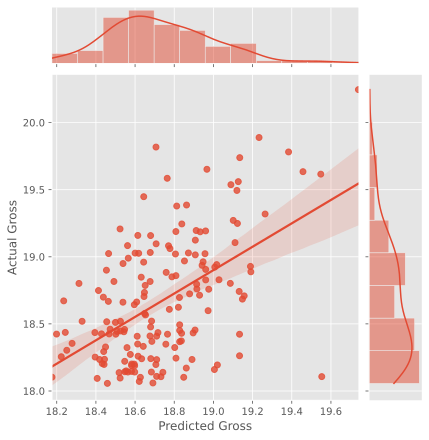

In [846]:
  # generate predictions (on training data) using fit model
# a plot of actual vs. predicted values


sns.jointplot(x=lasso_predict,y=y_test, kind='reg')
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("./charts/movies_lasso_log_jointplot.png")

In [863]:
#lasso.predict(X) 

In [ ]:
#lasso path



# 8. check model residual  

### Ridge model Residuals

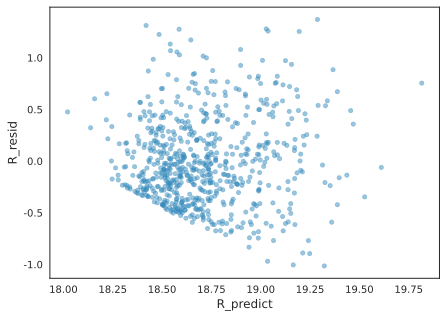

In [880]:
df_1['R_predict']= ridge.predict(X)
df_1['R_resid']= y- (df_1.R_predict)
with sns.axes_style('white'):
    plot = df_1.plot(
        kind='scatter', x='R_predict', y='R_resid', alpha=0.5, figsize=(7,5)) 

### Lasso model Residuals

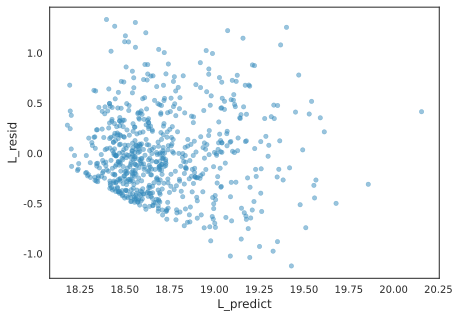

In [876]:
df_1['L_predict']= lasso.predict(X)
df_1['L_resid']= y- (df_1.L_predict)
with sns.axes_style('white'):
    plot = df_1.plot(
        kind='scatter', x='L_predict', y='L_resid', alpha=0.5, figsize=(7,5)) 

# 9. check Diagnostic plots

### Ridge 

In [881]:
# get code from: linear , assum, intro
import scipy.stats as stats

In [882]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

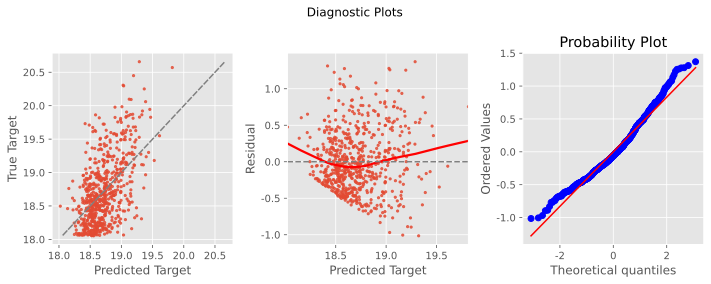

In [883]:
diagnostic_plots(df_1.R_predict, y, df_1.R_resid)

### Lasso

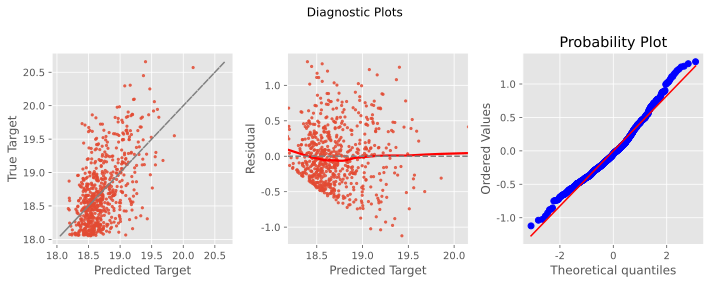

In [884]:
diagnostic_plots(df_1.L_predict, y, df_1.L_resid)

In [ ]:
# QQ plot: normal but light tailed

kim


Some options:
If underfit, try polynomial and/or interaction terms
If overfit, try regularization
A more customized feature perhaps?